In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df_input=pd.read_csv("MailOutput_latest.csv")
df_output=pd.read_csv("TM_LDA_output.csv")
df_output

,ID,isImportant
0,A1,False
1,A2,False
2,A3,True
3,A4,False
4,A5,False
...,...,...
3056,A3068,True
3057,A3069,True
3058,A3070,False
3059,A3071,False


In [3]:
df_combined=pd.merge(df_input,df_output,left_on="MessageID",right_on="ID").drop(['ID'], axis=1)
df_combined.set_index("MessageID",inplace=True)
df_combined=df_combined.replace({'Status': {'Read': True, 'Unread': False}})
df_combined

,Date,Sender,Subject,EmailSize,Status,isSubscription,isEncrypted,isFlagged,AttachmentCount,AttachmentSize,isPrimaryRecipient,NoOfToValues,isCC,NoOfCCValues,isBCC,isImportant
MessageID,,,,,,,,,,,,,,,,
A1,2022-03-10 09:50:34-08:00,googlecommunityteam-noreply@google.com,"Dmml, finish setting up your new Google Account",81274,True,False,False,False,0,0,True,1,False,0,False,False
A2,2022-03-11 06:46:10+11:00,DailyDigest@email.join1440.com,You're in! Here's how 1440 works...,36157,False,True,False,False,0,0,True,1,False,0,False,False
A3,2022-03-10 14:46:24-05:00,nytdirect@nytimes.com,Welcome to The Morning newsletter,21708,False,False,False,False,0,0,True,1,False,0,False,True
A4,2022-03-10 19:47:44+00:00,crew@morningbrew.com,☕️ Caution: Morning Brew coming in hot,110830,False,True,False,False,0,0,True,1,False,0,False,False
A5,2022-03-10 19:49:16+00:00,dave@davenetics.com,Verify Your Email Address for NextDraft,23484,False,False,False,False,0,0,True,1,False,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A3045,2022-05-07 02:43:41-07:00,noemailid111@gmail.com,Subject Line: Here’s your free [lead magnet type],5674,False,False,False,False,0,0,False,1,True,1,False,False
A3046,2022-05-07 02:53:41-07:00,noemailid111@gmail.com,Subject Line: (New Post) [Post title],5451,False,False,False,False,0,0,True,1,False,0,False,False
A3047,2022-05-07 03:03:41-07:00,santhoshsrv45@gmail.com,Subject Line: Help us to help serve you better,5486,False,False,False,False,0,0,True,1,False,0,False,False


In [4]:
df_X = df_combined.loc[:, 'EmailSize':'isBCC'].to_numpy(dtype ='int32')
df_y = df_combined.loc[:, 'isImportant'].to_numpy(dtype ='int32')
df_Xtrain, df_Xtest, df_Ytrain, df_Ytest = train_test_split(df_X, df_y, test_size=0.2)

In [6]:
scaler = StandardScaler()
df_Xtrain = scaler.fit_transform(df_Xtrain)
df_Xtest = scaler.transform(df_Xtest)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

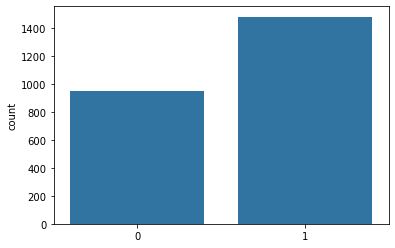

In [8]:
sns.countplot(df_Ytrain, color="C0")

In [9]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=12))
model.add(Dense(16, activation='relu', input_dim=12))
model.add(Dense(6, activation='relu', input_dim=12))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,053
Trainable params: 1,053
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(df_Xtrain,df_Ytrain,validation_split = 0.1, epochs=10, batch_size=100)

Epoch 1/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6830 - accuracy: 0.5551 - val_loss: 0.6690 - val_accuracy: 0.6008
Epoch 2/10
22/22 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.6118 - val_loss: 0.6497 - val_accuracy: 0.6008
Epoch 3/10
22/22 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.6118 - val_loss: 0.6358 - val_accuracy: 0.6091
Epoch 4/10
22/22 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.6141 - val_loss: 0.6269 - val_accuracy: 0.6049
Epoch 5/10
22/22 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.6150 - val_loss: 0.6207 - val_accuracy: 0.6049
Epoch 6/10
22/22 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.6177 - val_loss: 0.6164 - val_accuracy: 0.6008
Epoch 7/10
22/22 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.6173 - val_loss: 0.6163 - val_accuracy: 0.6049
Epoch 8/10
22/22 [==

In [12]:
model.evaluate(df_Xtrain,df_Ytrain)

76/76 [==============================] - 0s 424us/step - loss: 0.6033 - accuracy: 0.6239


[0.603315532207489, 0.6238682866096497]

In [13]:
output=model.predict(df_Xtest)
output
pred=[1 if i>0.5572 else 0 for i in output]

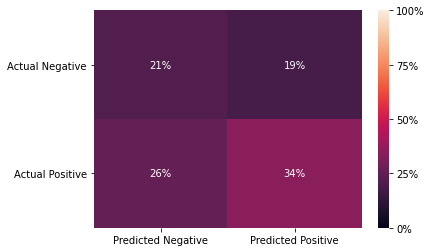

In [92]:
confusion = pd.DataFrame(confusion_matrix(df_Ytest, pred))
confusion = confusion.div(confusion.sum().sum())
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
ax = sns.heatmap(confusion, vmin=0, vmax=1, annot=True, fmt=".0%")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.collections[0].colorbar.set_ticks((0, .25, .5, .75, 1))
ax.collections[0].colorbar.set_ticklabels(("0%", "25%", "50%", "75%", "100%"))

In [90]:
import statistics

statistics.median(output)
#output

array([0.55729246], dtype=float32)

In [17]:
df_Xtest

array([[ 0.70558234, -0.12088746,  2.08624613, ..., -0.80187407,
        -0.80187407,  0.        ],
       [-0.42805532, -0.12088746, -0.47932983, ..., -0.80187407,
        -0.80187407,  0.        ],
       [-0.43974063, -0.12088746, -0.47932983, ...,  1.24707861,
         1.24707861,  0.        ],
       ...,
       [-0.4336652 , -0.12088746, -0.47932983, ...,  1.24707861,
         1.24707861,  0.        ],
       [-0.43296688, -0.12088746, -0.47932983, ..., -0.80187407,
        -0.80187407,  0.        ],
       [-0.43704044, -0.12088746, -0.47932983, ..., -0.80187407,
        -0.80187407,  0.        ]])